In [34]:
## Trying different clustering methods on the extracted feature arrays
## More note can be found in the trial and test note.docx

%matplotlib inline 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.mixture import GMM, DPGMM
from sklearn.pipeline import make_pipeline
from time import time
from sklearn import metrics
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
# Next line to silence pyflakes. This import is needed.
Axes3D



# #import vectorized feature arrays for acts and scenes
act_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllAct_Features_Vectorize.txt',sep=',',header = None)
scene_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllScene_Features_Vectorize.txt',sep=',',header = None)
play_Vect = pd.read_csv('VectorizedFeatures/AllComplied/ALLPlay_Features_Vectorize.txt',sep=',',header = None)

#import LSA reduced vectorized feature arrays for acts and scenes
act_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Act_Features_Vectorize_LSA.txt',sep=',',header = None)
scene_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Scene_Features_Vectorize_LSA.txt',sep=',',header = None )
play_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Play_Features_Vectorize_LSA.txt',sep=',',header = None )

#import labels
act_Labels = pd.read_csv('LSA_VectorizedFeatures/act_feature_labels.txt',sep='\n',header = None)
scene_Labels= pd.read_csv('LSA_VectorizedFeatures/scene_feature_labels.txt',sep='\n',header = None )
play_Labels= pd.read_csv('LSA_VectorizedFeatures/play_feature_labels.txt',sep='\n',header = None )

# print(scene_Labels)
#     explained_variance = svd.explained_variance_ratio_.sum()
#     print(explained_variance)



In [163]:
## Function to get the annotation label
def get_play_number(X):
    result = []
    num = 0
    for i in range(len(X)):
        try:
            if X[0][i].split("_")[0] != X[0][i+1].split("_")[0]:
                num = num + 1            
            result.append(num)
        except:
            result.append(num)
    return result

play_annot = get_play_number(play_Labels)
act_annot = get_play_number(act_Labels)
scene_annot = get_play_number(scene_Labels)

In [178]:
## Adapated from http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#example-manifold-plot-compare-methods-py
## There are errors when apply to scene_Vect
## Visualize the plays by projecting them on non-linear plane to differ from the PCA projection
def manifold_projection(X,L=None, n_neighbors = 10,n_components = 2):
    
    
    fig = plt.figure(figsize=(25, 8))
    plt.suptitle("Manifold projection with %s , %i neighbors"
             % ("Shakespear plays", n_neighbors), fontsize=14)


    size = len(X)
    color = range(size)
    color = [x/size for x in color]

    methods = ['standard', 'ltsa', 'hessian', 'modified']
    labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
    

   

    for i, method in enumerate(methods):
        t0 = time()
        Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method=method).fit_transform(X)
        t1 = time()
        print("%s: %.2g sec" % (methods[i], t1 - t0))

        ax = fig.add_subplot(252 + i)
        plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
        plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
        plt.axis('tight')

    t0 = time()
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
    t1 = time()
    print("Isomap: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("Isomap (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')


    t0 = time()
    mds = manifold.MDS(n_components, max_iter=100, n_init=1)
    Y = mds.fit_transform(X)
    t1 = time()
    print("MDS: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(258)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("MDS (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')


    t0 = time()
    se = manifold.SpectralEmbedding(n_components=n_components,
                                    n_neighbors=n_neighbors)
    Y = se.fit_transform(X)
    t1 = time()
    print("SpectralEmbedding: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(259)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("t-SNE: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(250)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("t-SNE (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')

    plt.show()


Visualizing the play_Vect features without labels... 

standard: 0.12 sec
ltsa: 0.088 sec
hessian: 0.087 sec
modified: 0.079 sec
Isomap: 0.022 sec
MDS: 0.029 sec
SpectralEmbedding: 0.062 sec
t-SNE: 0.18 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


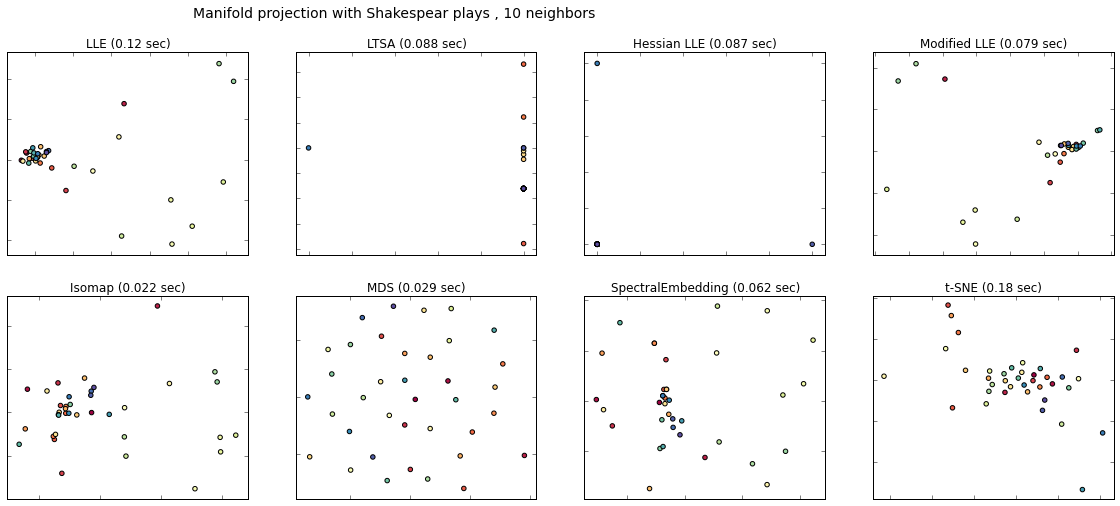


Visualizing the act_Vect features without labels... 

standard: 0.61 sec
ltsa: 0.55 sec
hessian: 0.58 sec
modified: 0.62 sec
Isomap: 0.39 sec
MDS: 0.12 sec
SpectralEmbedding: 0.37 sec
t-SNE: 1.2 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


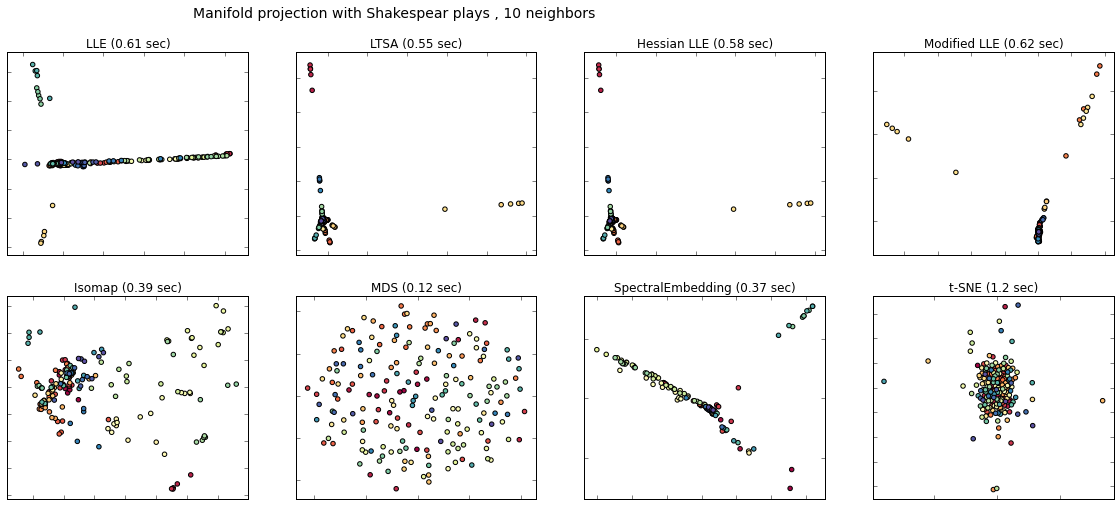


Visualizing the play_Vect_LSA features without labels... 

standard: 0.033 sec
ltsa: 0.042 sec
hessian: 0.018 sec
modified: 0.013 sec
Isomap: 0.003 sec
MDS: 0.01 sec
SpectralEmbedding: 0.01 sec
t-SNE: 0.14 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


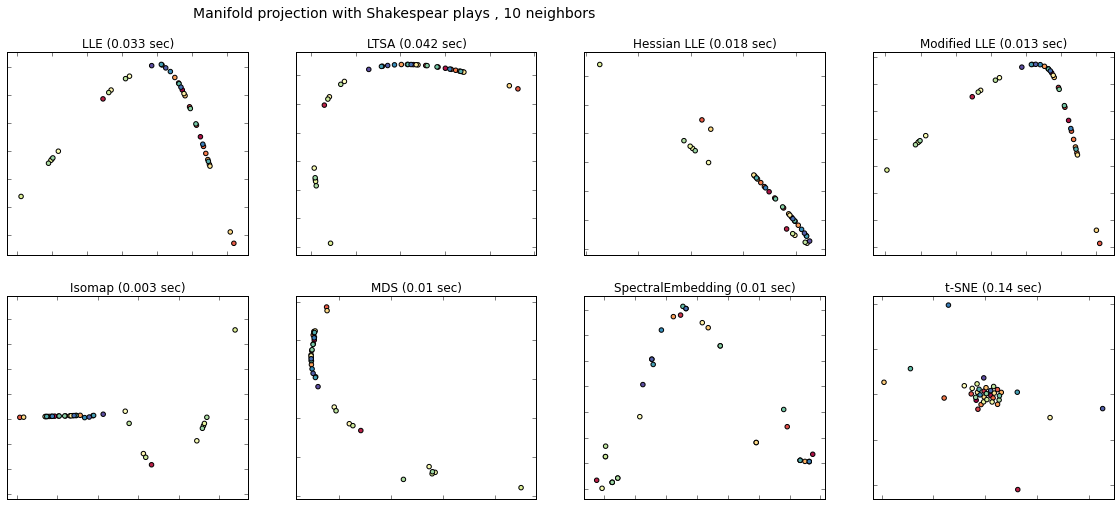


Visualizing the act_Vect_LSA features without labels... 

standard: 0.033 sec
ltsa: 0.04 sec
hessian: 0.11 sec
modified: 0.064 sec
Isomap: 0.017 sec
MDS: 0.044 sec
SpectralEmbedding: 0.081 sec
t-SNE: 0.33 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


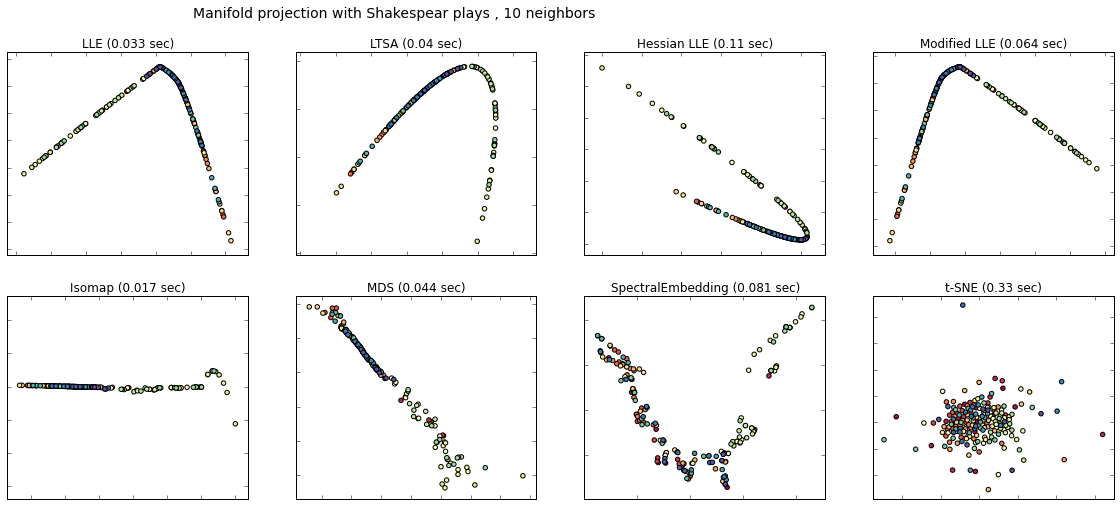


Visualizing the scene_Vect_LSA features without labels... 

standard: 0.11 sec
ltsa: 0.14 sec
hessian: 0.27 sec
modified: 0.18 sec
Isomap: 0.25 sec
MDS: 2.5 sec
SpectralEmbedding: 1.3 sec
t-SNE: 11 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


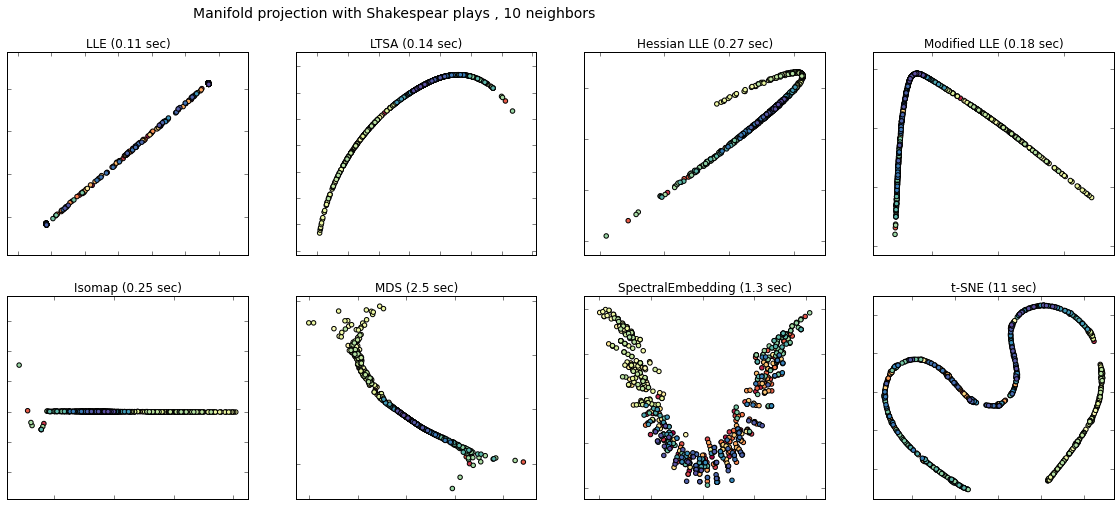

In [179]:
print("\nVisualizing the play_Vect features without labels... \n")
manifold_projection(play_Vect)
print("\nVisualizing the act_Vect features without labels... \n")
manifold_projection(act_Vect)
print("\nVisualizing the play_Vect_LSA features without labels... \n")
manifold_projection(play_Vect_LSA)
print("\nVisualizing the act_Vect_LSA features without labels... \n")
manifold_projection(act_Vect_LSA)
print("\nVisualizing the scene_Vect_LSA features without labels... \n")
manifold_projection(scene_Vect_LSA)


Visualizing the play_Vect features with labels... 

standard: 0.056 sec
ltsa: 0.043 sec
hessian: 0.054 sec
modified: 0.052 sec
Isomap: 0.018 sec
MDS: 0.016 sec
SpectralEmbedding: 0.033 sec
t-SNE: 0.16 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


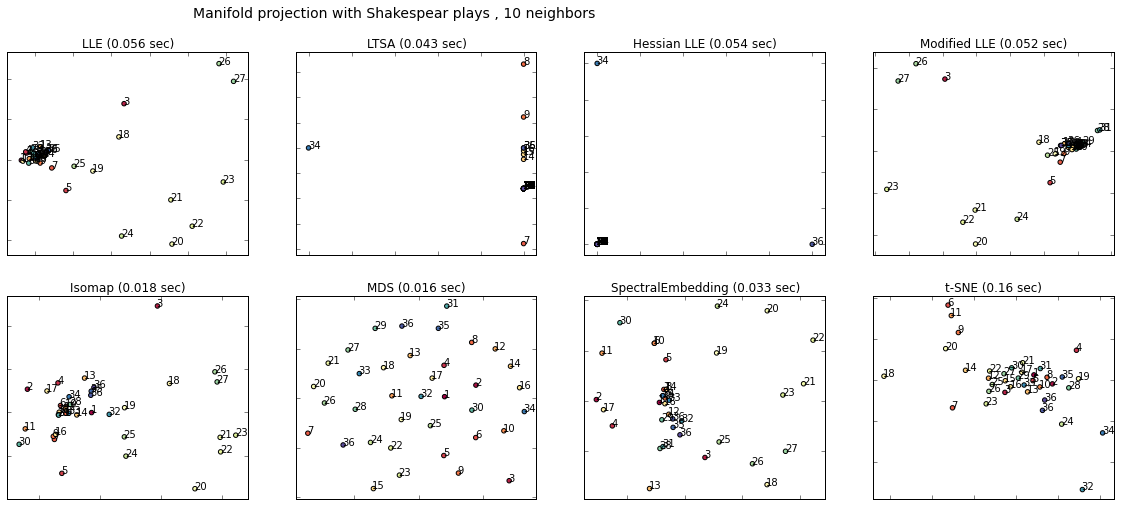


Visualizing the act_Vect features with labels... 

standard: 0.64 sec
ltsa: 0.56 sec
hessian: 0.66 sec
modified: 0.58 sec
Isomap: 0.38 sec
MDS: 0.1 sec
SpectralEmbedding: 0.62 sec
t-SNE: 1.3 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


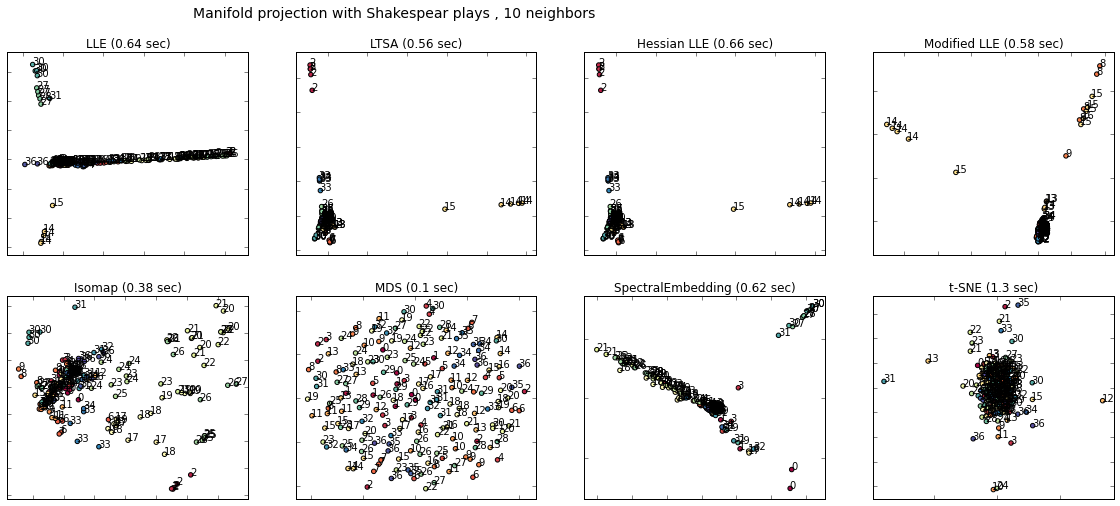


Visualizing the play_Vect_LSA features with labels... 

standard: 0.017 sec
ltsa: 0.01 sec
hessian: 0.03 sec
modified: 0.027 sec
Isomap: 0.004 sec
MDS: 0.005 sec
SpectralEmbedding: 0.008 sec
t-SNE: 0.14 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


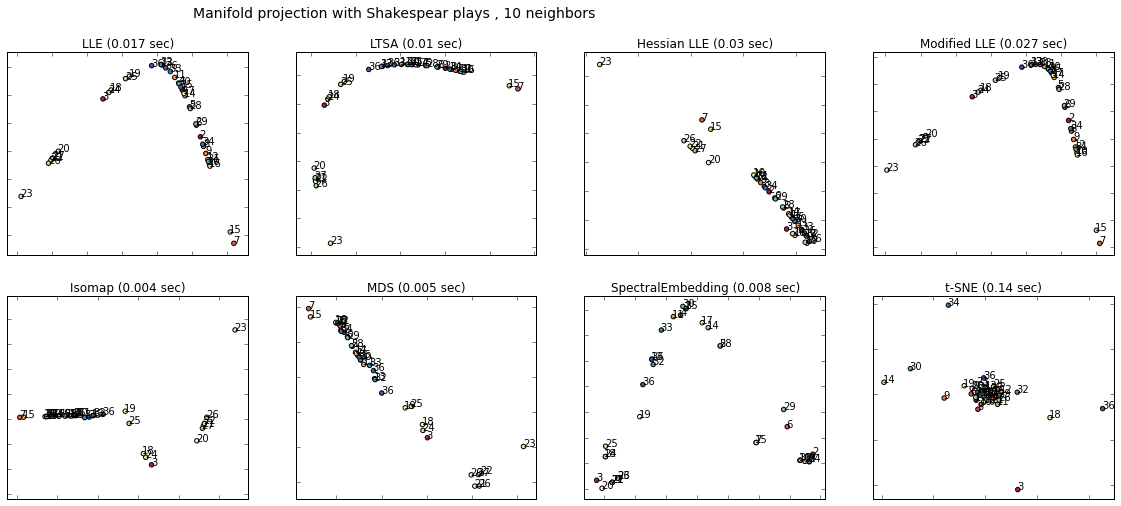


Visualizing the act_Vect_LSA features with labels... 

standard: 0.034 sec
ltsa: 0.084 sec
hessian: 0.063 sec
modified: 0.042 sec
Isomap: 0.017 sec
MDS: 0.039 sec
SpectralEmbedding: 0.05 sec
t-SNE: 0.32 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


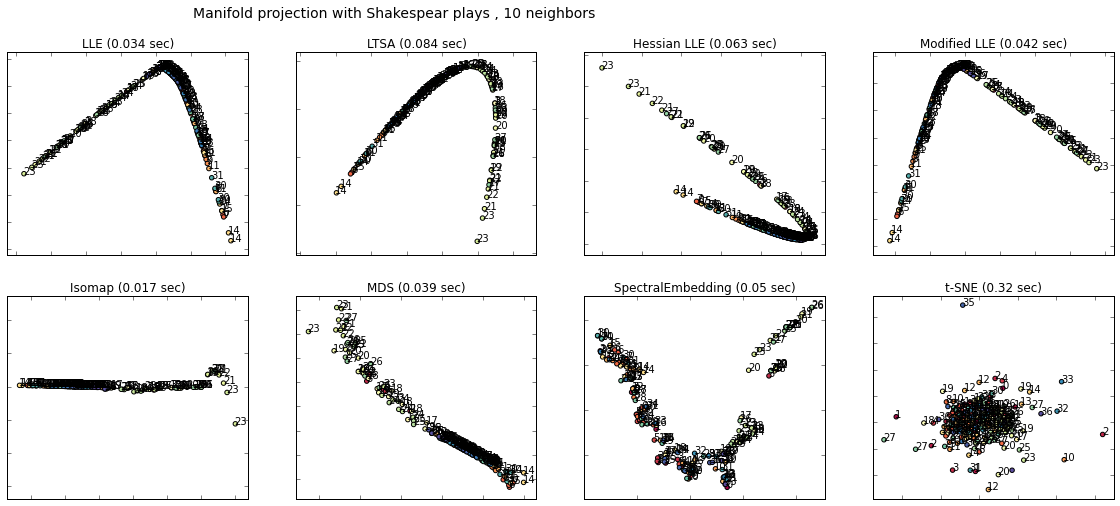


Visualizing the scene_Vect_LSA features with labels... 

standard: 0.11 sec
ltsa: 0.14 sec
hessian: 0.24 sec
modified: 0.18 sec
Isomap: 0.24 sec
MDS: 2.1 sec
SpectralEmbedding: 1.4 sec
t-SNE: 11 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


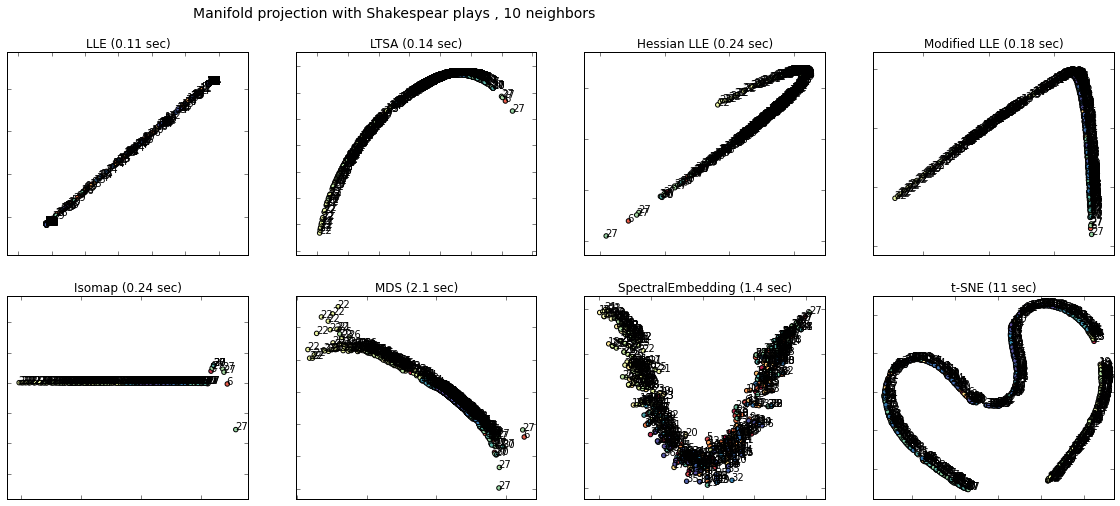

In [180]:
print("\nVisualizing the play_Vect features with labels... \n")
manifold_projection(play_Vect,play_annot)
print("\nVisualizing the act_Vect features with labels... \n")
manifold_projection(act_Vect,act_annot)
print("\nVisualizing the play_Vect_LSA features with labels... \n")
manifold_projection(play_Vect_LSA,play_annot)
print("\nVisualizing the act_Vect_LSA features with labels... \n")
manifold_projection(act_Vect_LSA,act_annot)
print("\nVisualizing the scene_Vect_LSA features with labels... \n")
manifold_projection(scene_Vect_LSA,scene_annot)

In [181]:
print(play_Labels)

                                           0
0                  all's well that ends well
1                             as you like it
2                       the comedy of errors
3                                  cymbeline
4                         loves labours lost
5                        measure for measure
6                 the merry wives of windsor
7                     the merchant of venice
8                  a midsummer night's dream
9                     much ado about nothing
10                  pericles, prince of tyre
11                   the taming of the shrew
12                               the tempest
13                      troilus and cressida
14                             twelfth night
15                   two gentlemen of verona
16                             winter's tale
17   the first part of king henry the fourth
18  the second part of king henry the fourth
19          the life of king henry the fifth
20    the first part of king henry the sixth
21   the s